In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('iris-data.csv')

In [5]:
df.head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


In [6]:
df.describe() # 打印数据的统计信息

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


#### DataFrame.dropna
+ axis:  
    axis=0: 删除包含缺失值的行  
    axis=1: 删除包含缺失值的列  
+ how: 与axis配合使用  
    how=‘any’ :只要有缺失值出现，就删除该行货列  
    how=‘all’: 所有的值都缺失，才删除行或列  
+ thresh： axis中至少有thresh个非缺失值，否则删除  
    比如 axis=0，thresh=10：标识如果该行中非缺失值的数量小于10，将删除改行  
+ subset: list  
    在哪些列中查看是否有缺失值
+ inplace: 是否在原数据上操作。如果为真，返回None否则返回新的copy，去掉了缺失值

In [9]:
df = df.dropna(subset=['petal_width_cm'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    145 non-null float64
sepal_width_cm     145 non-null float64
petal_length_cm    145 non-null float64
petal_width_cm     145 non-null float64
class              145 non-null object
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [10]:
# API http://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot
# Examples http://seaborn.pydata.org/examples/index.html
import seaborn as sns # 数据可视化包

F:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
F:\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
F:\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


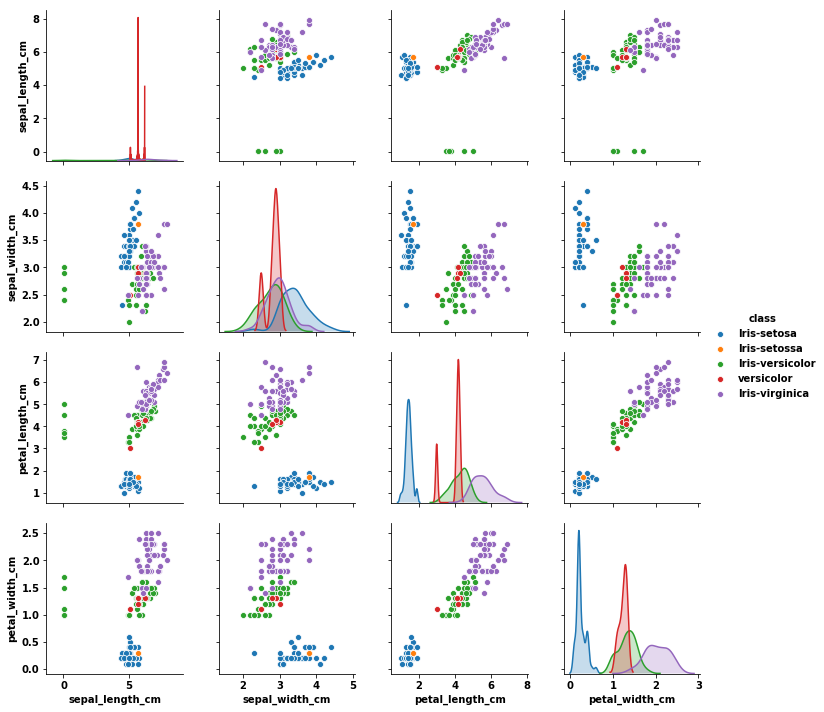

In [11]:
# hue : string (variable name), optional
#Variable in data to map plot aspects to different colors.
sns.pairplot(df, hue='class', size=2.5)

In [12]:
# class中值的统计数量
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [13]:
# 将class列的值替换
df['class'].replace(["Iris-setossa","versicolor"],["Iris-setosa","Iris-versicolor"], inplace=True )
df['class'].value_counts()

F:\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Iris-versicolor    50
Iris-virginica     50
Iris-setosa        45
Name: class, dtype: int64

## Simple Logistic Regression

只保留两类，其他类drop掉

In [14]:
final_df = df[df['class'] != 'Iris-virginica']

In [16]:
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Outlier Check

F:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


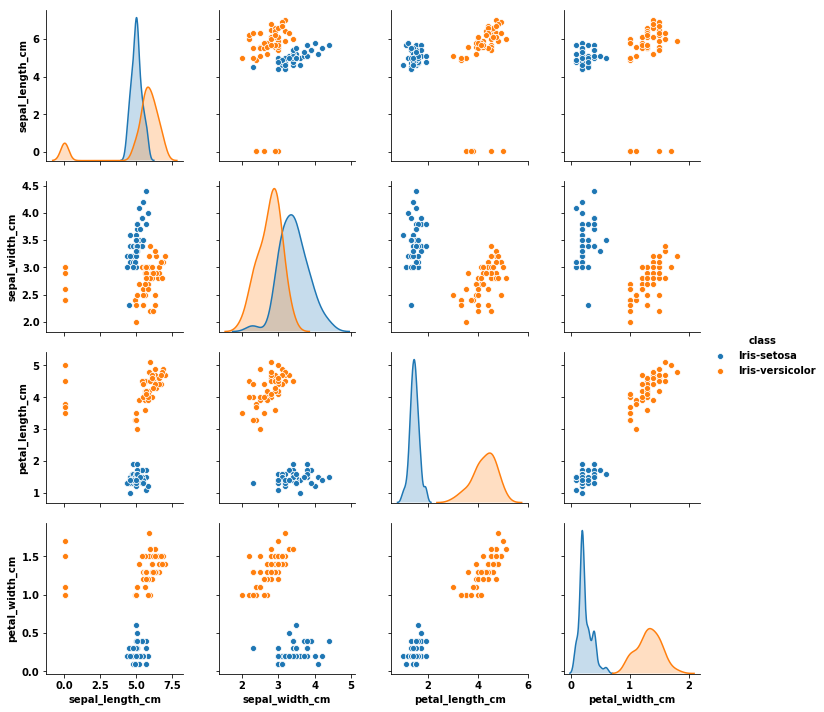

In [17]:
sns.pairplot(final_df, hue='class', size=2.5)

从上面的图可以看出，sepal_width 和 sepal_length seems to have outliers

#### SEPAL LENGTH

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000186644B7EB8>]],
      dtype=object)

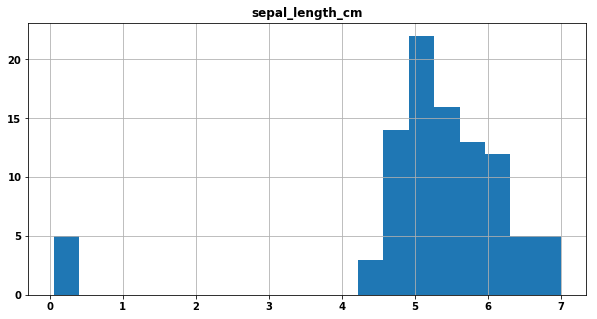

In [18]:
# 对DataFrame构建一个直方图显示
final_df.hist(column='sepal_length_cm', bins=20, figsize=(10, 5))

It can be observed from the plot, that for 5 data points values are below 1 and they seem to be outliers. So, these data points are considered to be in 'm' and are converted to 'cm'.

F:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000186661E3F98>]],
      dtype=object)

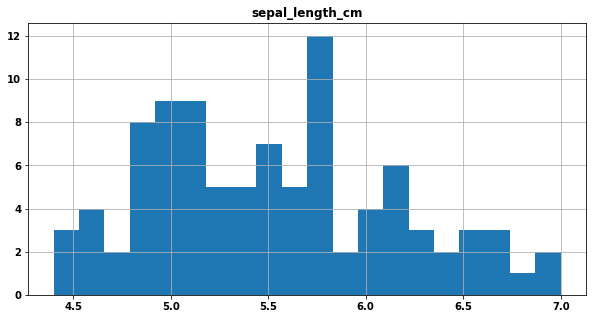

In [19]:
# 找到小于1的样本，并将其数值乘以100
final_df.loc[final_df.sepal_length_cm < 1, ['sepal_length_cm']] = final_df['sepal_length_cm']*100
final_df.hist(column='sepal_length_cm', bins=20, figsize=(10, 5))

#### SEPAL WIDTH

In [21]:
final_df = final_df.drop(final_df[(final_df['class'] == 'Iris-setosa') & (final_df['sepal_width_cm'] < 2.5)].index)

F:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


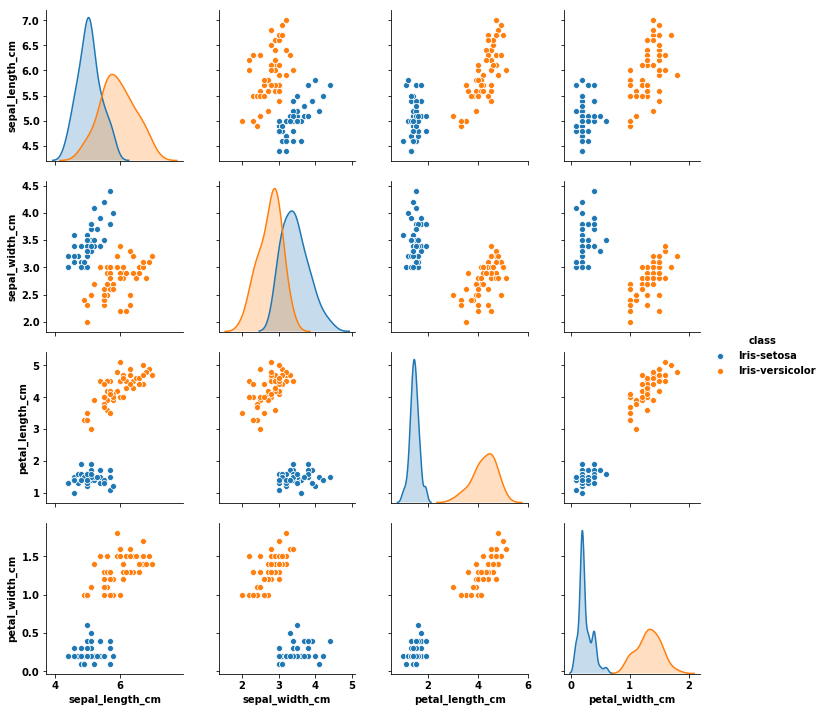

In [22]:
sns.pairplot(final_df, hue='class',size=2.5)

## Label Encoding

In [23]:
# 将label 转换成数字1,0
final_df['class'].replace(["Iris-setosa","Iris-versicolor"], [1,0], inplace=True)

In [24]:
final_df.head(10)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
12,4.8,3.0,1.4,0.1,1
13,5.7,3.0,1.1,0.1,1
14,5.8,4.0,1.2,0.2,1


## Model Construction

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [90]:
X = final_df.drop(['class'], axis=1)
y = final_df.drop(['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm'], axis=1)

# 归一化
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = y.as_matrix().flatten()
#数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.2)
X_train.shape, X_test.shape, len(y_test), len(y_train)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


((75, 4), (19, 4), 19, 75)

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [92]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
lr.score(X_test, y_test)

1.0

In [94]:
y_pred = lr.predict(X_test)
y_pred_pro = lr.predict_proba(X_test)

In [95]:
accuracy_score(y_test, y_pred)

1.0

In [96]:
precision_score(y_test, y_pred)

1.0

In [97]:
recall_score(y_test, y_pred)

1.0

In [98]:
f1_score(y_test, y_pred)

1.0

In [99]:
roc_auc_score(y_test, y_pred_pro[:,1])

1.0

In [100]:
metrics.classification_report(y_test,y_pred)    # 输出分类信息

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         8\n           1       1.00      1.00      1.00        11\n\n   micro avg       1.00      1.00      1.00        19\n   macro avg       1.00      1.00      1.00        19\nweighted avg       1.00      1.00      1.00        19\n'

In [101]:
label = list(set(y))    # 去重复，得到标签类别
metrics.confusion_matrix(y_test, y_pred, labels=label)  # 输出混淆矩阵信息

array([[ 8,  0],
       [ 0, 11]], dtype=int64)